In [2]:
from pyCodeLib import *
import warnings
import glob
import re
import numpy as np
import pandas as pd
from Bio.PDB.Polypeptide import one_to_three

warnings.filterwarnings('ignore')


# sys.path.insert(0, MYHOME)
%load_ext autoreload
%autoreload 2

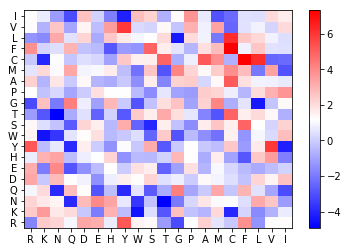

In [233]:
gamma = np.loadtxt("/Users/weilu/Research/server/april_2019/complete_gammas/saved_gammas/optimization_restart_iter1/proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0_gamma_filtered")
plot_contact_well(gamma[:210], inferBound=True, invert_sign=False)

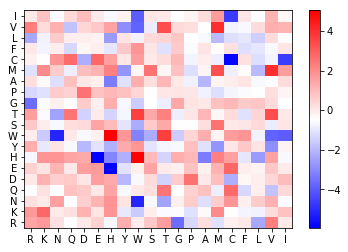

In [234]:
plot_contact_well(gamma[210:420], inferBound=True, invert_sign=False)

# actually this part is all about alpha beta protein. not what I want.

In [108]:
with open("/Users/weilu/Research/database/queriedPDB.dat") as f:
    a = f.readlines()
a = [i.strip() for i in a]
pdb_list = a[1:-1]

In [109]:
len(pdb_list)

456

In [114]:
from Bio.PDB.PDBParser import PDBParser
data_raw = []
for protein in pdb_list:
    pre = "/Users/weilu/Research/server/april_2019/setup_test_set/cleaned_pdbs/" + protein.lower()
    name = protein
    problematic = 0
    pdbFileLocation = pre + ".pdb"
    structure = PDBParser().get_structure(name, pdbFileLocation)
    seq = ""
    for r in structure.get_residues():
        _, _, chain, (_, resId, _) = r.get_full_id()
        try:
            resName = three_to_one(r.get_resname())
        except:
            problematic = 2
        # assert chain == "A"
#         if chain != chainName:
#             print(i, name, length, len(seq1), chain, chainName)
#             problematic = 3
        seq += resName
    length = len(seq)
    data_raw.append([name, length, seq, problematic])


In [133]:
data = pd.DataFrame(data_raw, columns=["Name", "Length", "Seq", "Problematic"]).drop("Problematic", axis=1)

In [127]:
data.sort_values("Length").reset_index(drop=True).to_csv("/Users/weilu/Research/library/test_set_info.csv")

In [130]:
data = pd.read_csv("/Users/weilu/Research/library/test_set_info.csv", index_col=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a207db470>]],
      dtype=object)

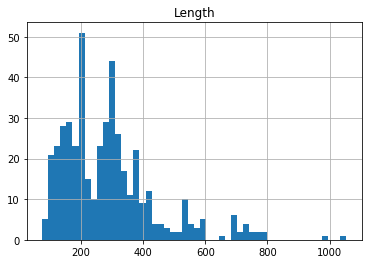

In [125]:
data.sort_values("Length").hist("Length", bins=50)

In [3]:
os.chdir("/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter7/")

In [ ]:
"/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter7/gammas/"

In [6]:
dataset = {"old":("1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", "), 40),
            "new":("1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", "), 80),
            "test":(['1A2J', '1A3H', '1A5Y', '1A8Q', '1AGY', '1AKZ', '1AUZ', '1B1A', '1B31', '1B8X', '1BCO', '1BN6', '1BOH', '1BOI'], 40)}

new_simulation_list = ["bias_2","bias_old_gamma", "iter1_with_bias_96percent", "new_iter2_10", "new_iter1_90", "new_iter2_8", "old_new_iter2_8"]
old_protein_simulation_list = ["iter6_30", "iter5_30", "single", "new_iter3_10", "iter4_30", "iter4_6", "iter4_13"]
simulation_location_list_dic = {}
for p in dataset["new"][0]:
    name = p.lower()[:4]
    simulation_location_list_dic[name] = new_simulation_list
for p in dataset["old"][0]:
    name = p.lower()[:4]
    simulation_location_list_dic[name] = old_protein_simulation_list


In [39]:
dataset = {"old":("1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", "), 40),
            "new":("1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", "), 80),
            "test":(['1A2J', '1A3H', '1A5Y', '1A8Q', '1AGY', '1AKZ', '1AUZ', '1B1A', '1B31', '1B8X', '1BCO', '1BN6', '1BOH', '1BOI'], 40)}

new_simulation_list = ["new_iter2_8","bias_old_gamma"]
old_protein_simulation_list = ["iter6_30", "iter5_30"]
simulation_location_list_dic = {}
for p in dataset["new"][0]:
    name = p.lower()[:4]
    simulation_location_list_dic[name] = new_simulation_list
for p in dataset["old"][0]:
    name = p.lower()[:4]
    simulation_location_list_dic[name] = old_protein_simulation_list


In [60]:
gamma_file_name = "iter7_thrid_gen"
gamma_file_name = "gammas/proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0_gamma_filtered"
gamma_file_name = "test"
z_scores, e_natives, e_mgs, e_mg_stds = validate_hamiltonian_wei(
    "phi_list.txt", "proteins_name_list.txt", gamma_file_name, 
    "lammps", len(new_simulation_list)*6000, mode=2, simulation_location_list_dic=simulation_location_list_dic)

0 (10.888644803657137+0j)


In [56]:
pre_i = 7
address = f"/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter{pre_i}/iter{pre_i}_thrid_gen"
pre_iter_gamma = np.loadtxt(address)

In [57]:
np.std(pre_iter_gamma)

1.1584179955828737

In [82]:
address = f"/Users/weilu/Research/server/april_2019/optimization_mult_seq/gammas/proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0_gamma_filtered"
gamma = np.loadtxt(address)
np.std(gamma)

0.046736615865453135

In [223]:
address = f"/Users/weilu/Research/server/april_2019/complete_gammas/iter0_gamma"
gamma = np.loadtxt(address)
np.std(gamma)

0.6487425261519498

In [225]:
iter0_normalized = gamma * np.std(original_gamma) / np.std(gamma)

In [226]:
np.std(iter0_normalized)

0.43622242366014413

In [227]:
np.savetxt("/Users/weilu/Research/server/april_2019/complete_gammas/iter0_normalized_gamma", iter0_normalized)

In [107]:
address = f"/Users/weilu/Research/server/april_2019/complete_gammas/iter4_gamma"
gamma = np.loadtxt(address)
np.std(gamma)

1.1584179955828737

In [86]:
address = f"/Users/weilu/Research/server/april_2019/complete_gammas/iter7_gamma"
iter7 = np.loadtxt(address)
np.std(iter7)

1.1584179955828737

In [224]:
address = f"/Users/weilu/Research/server/april_2019/complete_gammas/original_gamma.dat"
original_gamma = np.loadtxt(address)
np.std(original_gamma)

0.4362224236601442

In [90]:
np.mean(original_gamma)

-0.11829680821739127

In [91]:
np.mean(iter7)

0.10688544456383424

In [95]:
len(original_gamma)

690

In [102]:
iter7_normalized = iter7 * np.std(original_gamma) / np.std(iter7)

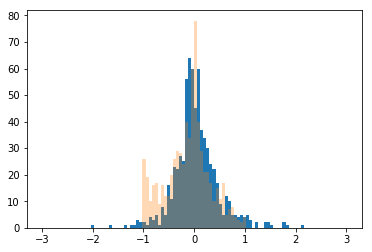

In [106]:

plt.hist(iter7_normalized.flatten(), bins=100, range=(-3,3))
a = plt.hist(original_gamma.flatten(), bins=100, range=(-3,3), alpha=0.3)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  26.,
         39.,  35.,  37.,  65.,  72., 124., 141.,  53.,  37.,  32.,  18.,
          7.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([-8.  , -7.84, -7.68, -7.52, -7.36, -7.2 , -7.04, -6.88, -6.72,
        -6.56, -6.4 , -6.24, -6.08, -5.92, -5.76, -5.6 , -5.44, -5.28,
        -5.12, -4.96, -4.8 , -4.64, -4.48, -4.32, -4.16, -4.  , -3.84,
        -3.68, -3.52, -3.36, -3.2 , -3.04, -2.88, -2.72, -2.56, -2.4 ,
        -2.24, -2.08, -1.92, -1.76

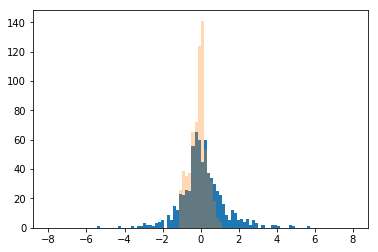

In [101]:

plt.hist(iter7.flatten(), bins=100, range=(-8,8))
plt.hist(original_gamma.flatten(), bins=100, range=(-8,8), alpha=0.3)

In [83]:
address = f"/Users/weilu/Research/server/april_2019/complete_gammas/iter0_gamma"
gamma = np.loadtxt(address)
np.std(gamma)

0.6487425261519498

In [80]:
pre_i = 7
address = f"/Users/weilu/Research/server/april_2019/optimization_mult_seq/gammas/proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0_gamma_filtered"
gamma = np.loadtxt(address)
np.std(gamma)
multiSeq = gamma * np.std(original_gamma) /np.std(gamma)


In [81]:
address = "/Users/weilu/Research/server/april_2019/fix_gamma_mix_error/multiSeq"
np.savetxt(address, multiSeq)

In [73]:
address = "/Volumes/Wei_backup/feb_2019/original_gamma.dat"
original_gamma = np.loadtxt(address)
np.std(original_gamma)

0.4362224236601442

In [74]:
address = "/Users/weilu/Research/server/april_2019/fix_gamma_mix_error/t_7_2"
gamma = np.loadtxt(address)
np.std(gamma)

1.1584179955828737

In [76]:
normalized = gamma * np.std(original_gamma) /np.std(gamma)

In [77]:
address = "/Users/weilu/Research/server/april_2019/fix_gamma_mix_error/t_7_normalized"
np.savetxt(address, normalized)

In [59]:
np.savetxt("test", gamma/np.std(gamma)*np.std(pre_iter_gamma))

In [58]:
np.std(gamma/np.std(gamma)*np.std(pre_iter_gamma))

1.1584179955828737

In [54]:
np.std(gamma)

4.486000166595644

In [ ]:
address = f"/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter7/gammas/proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0_gamma_filtered"
gamma = np.loadtxt(address)

In [66]:
gamma_file_name = "/Users/weilu/Research/server/march_2019/fix_gamma_mix_error/t_5"
z_scores, e_natives, e_mgs, e_mg_stds = validate_hamiltonian_wei(
    "phi_list.txt", "proteins_name_list.txt", gamma_file_name, 
    "lammps", len(new_simulation_list)*6000, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data = pd.DataFrame([nameList, z_scores, e_natives, e_mgs, e_mg_stds], 
                    index=["Name", "Z", "E_Natives", "E_mgs", "E_mg_stds"]).T
data.Z = data.Z.astype(float)
data.E_Natives = data.E_Natives.astype(float)
data

0 (12.902492168806434+0j)


,Name,Z,E_Natives,E_mgs,E_mg_stds
0,1FC2C,12.902492,-72.939507,-14.5936,4.52206
1,1ENH,10.936765,-94.788777,-19.966,6.8414
2,2GB1,12.988132,-131.775597,-27.7624,8.00833
3,2CRO,10.867731,-130.273058,-25.1145,9.67622
4,1CTF,10.445175,-123.937394,-28.4003,9.14653
5,4ICB,12.425854,-167.259641,-46.5205,9.71677
6,1R69,4.628182,-114.374358,-40.9413,15.8665
7,1UTG,4.358094,-126.820263,-59.8845,15.3589
8,3ICB,3.778402,-161.489415,-113.374,12.7343
9,256BA,2.836460,-159.889357,-78.9694,28.5285


In [67]:
gamma_file_name = "/Users/weilu/Research/server/march_2019/fix_gamma_mix_error/t_7"
z_scores, e_natives, e_mgs, e_mg_stds = validate_hamiltonian_wei(
    "phi_list.txt", "proteins_name_list.txt", gamma_file_name, 
    "lammps", len(new_simulation_list)*6000, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data = pd.DataFrame([nameList, z_scores, e_natives, e_mgs, e_mg_stds], 
                    index=["Name", "Z", "E_Natives", "E_mgs", "E_mg_stds"]).T
data.Z = data.Z.astype(float)
data.E_Natives = data.E_Natives.astype(float)
data

0 (15.394139633453651+0j)


,Name,Z,E_Natives,E_mgs,E_mg_stds
0,1FC2C,15.394140,-67.082927,-12.7573,3.52898
1,1ENH,14.454072,-82.326354,-16.2223,4.57339
2,2GB1,17.995654,-120.965843,-22.645,5.46359
3,2CRO,14.485697,-111.494256,-19.7966,6.33022
4,1CTF,11.557301,-111.826330,-24.7091,7.53785
5,4ICB,13.055911,-137.497174,-39.0883,7.53749
6,1R69,6.178104,-92.994433,-30.7364,10.0772
7,1UTG,5.467374,-97.024359,-45.5508,9.41469
8,3ICB,5.426244,-130.648535,-82.8196,8.81438
9,256BA,4.438673,-123.890840,-54.9674,15.5279


In [65]:
gamma_file_name = "/Users/weilu/Research/server/march_2019/fix_gamma_mix_error/t_6"
z_scores, e_natives, e_mgs, e_mg_stds = validate_hamiltonian_wei(
    "phi_list.txt", "proteins_name_list.txt", gamma_file_name, 
    "lammps", len(new_simulation_list)*6000, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data = pd.DataFrame([nameList, z_scores, e_natives, e_mgs, e_mg_stds], 
                    index=["Name", "Z", "E_Natives", "E_mgs", "E_mg_stds"]).T
data.Z = data.Z.astype(float)
data.E_Natives = data.E_Natives.astype(float)
data

0 (15.557881500459525+0j)


,Name,Z,E_Natives,E_mgs,E_mg_stds
0,1FC2C,15.557882,-66.409632,-12.584,3.4597
1,1ENH,14.481983,-82.012968,-16.1626,4.54706
2,2GB1,18.132325,-120.221625,-22.5164,5.38845
3,2CRO,14.629681,-110.247560,-19.5473,6.19974
4,1CTF,11.518154,-111.089092,-24.6283,7.50648
5,4ICB,13.167126,-136.222312,-38.5971,7.41431
6,1R69,6.047398,-92.728155,-30.8776,10.2276
7,1UTG,5.227171,-95.725888,-45.4891,9.61071
8,3ICB,5.297855,-129.444069,-82.6104,8.84012
9,256BA,4.179782,-122.787016,-55.5428,16.088


In [68]:
gamma_file_name = "/Users/weilu/Research/server/march_2019/fix_gamma_mix_error/t_7_2"
z_scores, e_natives, e_mgs, e_mg_stds = validate_hamiltonian_wei(
    "phi_list.txt", "proteins_name_list.txt", gamma_file_name, 
    "lammps", len(new_simulation_list)*6000, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data = pd.DataFrame([nameList, z_scores, e_natives, e_mgs, e_mg_stds], 
                    index=["Name", "Z", "E_Natives", "E_mgs", "E_mg_stds"]).T
data.Z = data.Z.astype(float)
data.E_Natives = data.E_Natives.astype(float)
data

0 (14.95306946470842+0j)


,Name,Z,E_Natives,E_mgs,E_mg_stds
0,1FC2C,14.953069,-59.898056,-11.3384,3.24747
1,1ENH,13.864714,-70.647750,-13.9516,4.08924
2,2GB1,17.531352,-106.238755,-19.8175,4.92953
3,2CRO,14.272086,-96.801886,-17.1511,5.58088
4,1CTF,11.259620,-92.898240,-20.598,6.4212
5,4ICB,12.790158,-124.714568,-35.3586,6.98631
6,1R69,6.966446,-85.374952,-26.9794,8.38241
7,1UTG,6.731735,-94.339031,-41.1663,7.89882
8,3ICB,7.425543,-119.708526,-68.3466,6.91692
9,256BA,5.390923,-118.059756,-48.3401,12.9328


In [62]:
gamma_file_name = "/Users/weilu/Research/server/march_2019/fix_gamma_mix_error/t"
z_scores, e_natives, e_mgs, e_mg_stds = validate_hamiltonian_wei(
    "phi_list.txt", "proteins_name_list.txt", gamma_file_name, 
    "lammps", len(new_simulation_list)*6000, mode=2, simulation_location_list_dic=simulation_location_list_dic)
data = pd.DataFrame([nameList, z_scores, e_natives, e_mgs, e_mg_stds], 
                    index=["Name", "Z", "E_Natives", "E_mgs", "E_mg_stds"]).T
data.Z = data.Z.astype(float)
data.E_Natives = data.E_Natives.astype(float)
data

0 (15.881770605078113+0j)


,Name,Z,E_Natives,E_mgs,E_mg_stds
0,1FC2C,15.881771,-69.026462,-13.1503,3.51826
1,1ENH,15.042489,-88.963180,-17.4922,4.75127
2,2GB1,18.434727,-127.254795,-23.9252,5.60516
3,2CRO,14.679367,-118.191521,-21.0059,6.62056
4,1CTF,11.772371,-124.534577,-27.5061,8.24205
5,4ICB,13.373861,-139.045679,-39.5249,7.44144
6,1R69,5.286558,-93.297144,-32.6843,11.4655
7,1UTG,4.003590,-89.440327,-46.6201,10.6955
8,3ICB,3.539106,-130.550986,-93.1623,10.5644
9,256BA,3.295272,-117.900011,-58.654,17.9791


In [63]:
# normalized with std.

In [61]:
data = pd.DataFrame([nameList, z_scores, e_natives, e_mgs, e_mg_stds], 
                    index=["Name", "Z", "E_Natives", "E_mgs", "E_mg_stds"]).T
data.Z = data.Z.astype(float)
data.E_Natives = data.E_Natives.astype(float)
data

,Name,Z,E_Natives,E_mgs,E_mg_stds
0,1FC2C,10.888645,-27.679025,-5.20934,2.06359
1,1ENH,9.251952,-24.048072,-4.82697,2.07752
2,2GB1,12.410122,-43.414874,-7.88703,2.86281
3,2CRO,10.234838,-37.913786,-6.68482,3.05124
4,1CTF,7.645952,-24.047627,-5.33915,2.44685
5,4ICB,10.266856,-62.414439,-17.7518,4.35017
6,1R69,14.526236,-43.950599,-10.2149,2.3224
7,1UTG,18.617068,-64.288211,-19.3788,2.41227
8,3ICB,17.566746,-62.966443,-15.6378,2.69422
9,256BA,17.457549,-73.472311,-17.7937,3.18937


In [ ]:
# with more decoys.

In [41]:
data = pd.DataFrame([nameList, z_scores, e_natives, e_mgs, e_mg_stds], 
                    index=["Name", "Z", "E_Natives", "E_mgs", "E_mg_stds"]).T
data.Z = data.Z.astype(float)
data.E_Natives = data.E_Natives.astype(float)
data

,Name,Z,E_Natives,E_mgs,E_mg_stds
0,1FC2C,10.888645,-107.187656,-20.1733,7.99129
1,1ENH,9.251952,-93.126710,-18.6925,8.04524
2,2GB1,12.410122,-168.125094,-30.5427,11.0863
3,2CRO,10.234838,-146.822004,-25.8871,11.816
4,1CTF,7.645952,-93.124987,-20.676,9.47547
5,4ICB,10.266856,-241.701341,-68.7444,16.8461
6,1R69,14.526236,-170.199699,-39.5575,8.99353
7,1UTG,18.617068,-248.957567,-75.0448,9.34158
8,3ICB,17.566746,-243.838989,-60.5577,10.4334
9,256BA,17.457549,-284.523203,-68.9066,12.3509


In [20]:
nameList = dataset["new"][0] + dataset["old"][0]

In [37]:
data = pd.DataFrame([nameList, z_scores, e_natives, e_mgs, e_mg_stds], 
                    index=["Name", "Z", "E_Natives", "E_mgs", "E_mg_stds"]).T
data.Z = data.Z.astype(float)
data.E_Natives = data.E_Natives.astype(float)

In [38]:
data

,Name,Z,E_Natives,E_mgs,E_mg_stds
0,1FC2C,23.480789,-107.187656,-15.5339,3.90335
1,1ENH,26.479082,-93.126710,-13.9019,2.99198
2,2GB1,22.975176,-168.125094,-28.8205,6.06327
3,2CRO,31.285547,-146.822004,-18.9095,4.08855
4,1CTF,11.639435,-93.124987,-18.7614,6.38894
5,4ICB,18.548103,-241.701341,-63.6676,9.59849
6,1R69,14.591790,-170.199699,-43.0636,8.71285
7,1UTG,20.877930,-248.957567,-78.7209,8.15391
8,3ICB,19.381229,-243.838989,-58.0876,9.58409
9,256BA,17.424797,-284.523203,-72.1624,12.1873


# iter7 gamma

In [28]:
data = pd.DataFrame([nameList, z_scores, e_natives, e_mgs, e_mg_stds], 
                    index=["Name", "Z", "E_Natives", "E_mgs", "E_mg_stds"]).T
data.Z = data.Z.astype(float)
data.E_Natives = data.E_Natives.astype(float)

In [35]:
data

,Name,Z,E_Natives,E_mgs,E_mg_stds
0,1FC2C,20.736046,-54.027982,-8.9613,2.17335
1,1ENH,25.163685,-75.813521,-12.4091,2.51968
2,2GB1,20.575525,-99.521555,-19.1208,3.90759
3,2CRO,27.249896,-105.345429,-14.488,3.33423
4,1CTF,13.052314,-98.729705,-19.4564,6.0735
5,4ICB,20.471473,-134.771453,-34.2875,4.90849
6,1R69,2.991517,-95.344303,-52.5771,14.2962
7,1UTG,3.541324,-108.984502,-68.9202,11.3134
8,3ICB,1.407566,-130.398896,-118.733,8.28805
9,256BA,1.246208,-137.257527,-107.214,24.1078


In [138]:
pd.concat([data[:4],data[:4]]).reset_index(drop=False)

,index,Name,Length,Seq
0,0,1A2J,188,AQYEDGKQYTTLEKPVAGAPQVLEFFSFFCPHCYQFEEVLHISDNV...
1,1,1A3H,300,SVVEEHGQLSISNGELVNERGEQVQLKGMSSHGLQWYGQFVNYESM...
2,2,1A5Y,284,EMEKEFEQIDKSGSWAAIYQDIRHEASDFPCRVAKLPKNKNRNRYR...
3,3,1A8Q,274,PICTTRDGVEIFYKDWGQGRPVVFIHGWPLNGDAWQDQLKAVVDAG...
4,0,1A2J,188,AQYEDGKQYTTLEKPVAGAPQVLEFFSFFCPHCYQFEEVLHISDNV...
5,1,1A3H,300,SVVEEHGQLSISNGELVNERGEQVQLKGMSSHGLQWYGQFVNYESM...
6,2,1A5Y,284,EMEKEFEQIDKSGSWAAIYQDIRHEASDFPCRVAKLPKNKNRNRYR...
7,3,1A8Q,274,PICTTRDGVEIFYKDWGQGRPVVFIHGWPLNGDAWQDQLKAVVDAG...


In [172]:
Q = pd.read_csv(f"/Users/weilu/Research/server/april_2019/database/iter4_30_3icb_11/wham.dat")[" Qw"]

In [151]:
len(Q)

1000

In [162]:
a = pd.concat([Q, Q]).reset_index()
a["Rank"] = a["index"].rank(ascending=False)
a.query(f"Rank < {200*30}")

In [169]:
pd.read_csv("/Users/weilu/Research/server/april_2019/database/Q_bias_2_1ctf", index_col=0).head()

,index,Qw,Rank
0,0,0.261345,59985.5
1,1,0.291708,59955.5
2,2,0.282458,59925.5
3,3,0.218886,59895.5
4,4,0.262429,59865.5


In [177]:
a = pd.read_csv("/Users/weilu/Research/server/april_2019/database/Q_iter4_13_2fha", index_col=0).query(f"Rank < {200*30}")

In [200]:
simulation_location = "test"
name = "a"
sampled = a.sample(10).assign(Name=f"{simulation_location}_{name}_")
sampled["Location"] = sampled["Name"] + sampled["Run"].astype(str) + \
            "/frame" + sampled["index"].astype(str) + " " + sampled[" Qw"].round(3).astype(str)




In [ ]:
with open(f"decoys/lammps/{name}_{simulation_location}.decoys", "w") as out:
    for i, item in sampled.iterrows():
        f.write(f"{simulation_location}_{name}_{item['Run']}/frame{item['index']} {np.round(item[' Qw'], 3)}\n")

In [221]:
np.round(0.4124, 3)

0.412

In [222]:
for i, item in sampled.iterrows():
    print(f"{simulation_location}_{name}_{item['Run']}/frame{item['index']} {np.round(item[' Qw'], 3)}\n")

test_a_0/frame376 0.234

test_a_10/frame316 0.357

test_a_5/frame436 0.36

test_a_11/frame421 0.363

test_a_9/frame330 0.353

test_a_7/frame282 0.412

test_a_19/frame366 0.292

test_a_19/frame310 0.269

test_a_15/frame271 0.291

test_a_10/frame326 0.367



In [206]:
a = sampled["Location"].values

In [205]:
a.values

array(['test_a_0/frame376 0.234', 'test_a_10/frame316 0.357',
       'test_a_5/frame436 0.36', 'test_a_11/frame421 0.363',
       'test_a_9/frame330 0.353', 'test_a_7/frame282 0.412',
       'test_a_19/frame366 0.292', 'test_a_19/frame310 0.269',
       'test_a_15/frame271 0.291', 'test_a_10/frame326 0.367'],
      dtype=object)

In [150]:
pd.concat([Q, Q]).reset_index(drop=False)

,index,Qw
0,0,0.060984
1,1,0.137520
2,2,0.222031
3,3,0.197840
4,4,0.273562
5,5,0.266006
6,6,0.286569
7,7,0.218554
8,8,0.260241
9,9,0.332594


In [ ]:
data.to_csv()

In [230]:
HFscales = pd.read_csv("~/opt/small_script/Whole_residue_HFscales.txt", sep="\t")

In [231]:
HFscales

,AA,DGwif,DGwoct,Oct-IF
0,Ala,0.17,0.50,0.33
1,Arg+,0.81,1.81,1.00
2,Asn,0.42,0.85,0.43
3,Asp-,1.23,3.64,2.41
4,Asp0,-0.07,0.43,0.50
5,Cys,-0.24,-0.02,0.22
6,Gln,0.58,0.77,0.19
7,Glu-,2.02,3.63,1.61
8,Glu0,-0.01,0.11,0.12
9,Gly,0.01,1.15,1.14
